In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [28]:
data=pd.read_csv('..\\..\\Dataset\\Lang_det_parsed.csv')
sample_data=data['Text'].iloc[:100].values

In [29]:
#CountVectorize
count_vectorize=CountVectorizer()
vm=count_vectorize.fit_transform(sample_data)

In [31]:
doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(vm)]
feat_names = count_vectorize.get_feature_names_out()


sample_df = pd.DataFrame(data=vm.toarray(), index=doc_names,columns=feat_names)
sample_df


,ability,about,academic,accord,accurate,action,active,activity,actual,additionally,...,within,without,word,world,worldwide,would,year,years,zones,φύσις
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Doc96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(data['Text'].values,data['Class'].values,test_size=0.2,random_state=123,stratify=data['Class'].values)

In [60]:

tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train).toarray()

tfidf_test_vectors = tfidf_vectorizer.transform(X_test).toarray()


In [61]:
print(tfidf_train_vectors)

[[0.         0.31151734 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [51]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [62]:
predicted = model.fit(tfidf_train_vectors,y_train)

In [63]:
y_pred=model.predict(tfidf_test_vectors)

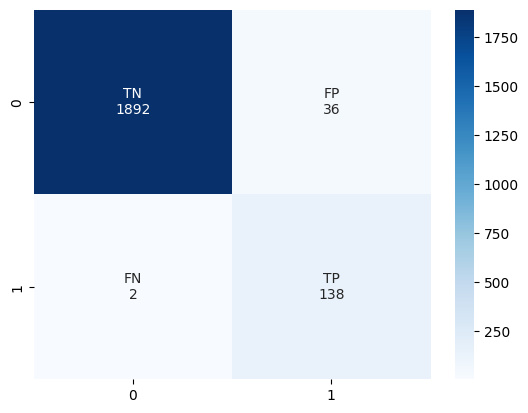

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import numpy as np
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [68]:
input_test=['oggi sono stato in uni a studiare big data']
tfidf_version=tfidf_vectorizer.transform(input_test).toarray()

print(model.predict(tfidf_version))

[0]


### 1. handling undersample

In [72]:
from collections import Counter
smote = SMOTE(random_state=42)
X_train_ros, y_train_ros= smote.fit_resample(tfidf_train_vectors, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 7711), (1, 7711)]


In [73]:
predicted = model.fit(X_train_ros,y_train_ros)


In [74]:
y_pred=model.predict(tfidf_test_vectors)

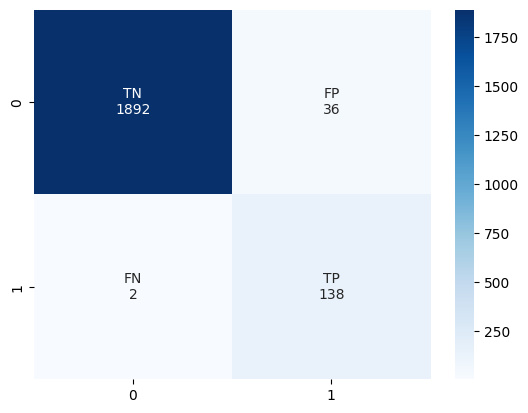

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import numpy as np
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [85]:
input_test=['the gatto è bello']
tfidf_version=tfidf_vectorizer.transform(input_test).toarray()

print(model.predict(tfidf_version))

[1]
